## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data set

In [2]:
#actually position_salaries dataset
df = pd.read_csv('86bca85f-9574-48d9-9e28-211ef24583fa.csv')
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


## extracting the x and y from the dataset

In [3]:
x = df.iloc[:,1:-1].values
y= df.iloc[:,-1].values

In [4]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Since the dataset here is very small and all the rows are giving important information therefore if we split them in training set and test set information will be lost so we skip this step. meaning we will use x and y completely as the training set

## creating and training the decision tree model

In [5]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

## predicitng the salary for the level between 6 and 7

In [7]:
c = np.array([[6.5]])
sal = dtr.predict(c)
print(sal)

[150000.]


## to check for errors we need multiplt y calculated. so to achieve it we can also use the whole data set as test set.

In [8]:
y_pred = dtr.predict(x)
print(y_pred)

[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


In [9]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(mse)
print(r2)

0.0
1.0


## Visualizing the dataset output with increased precision

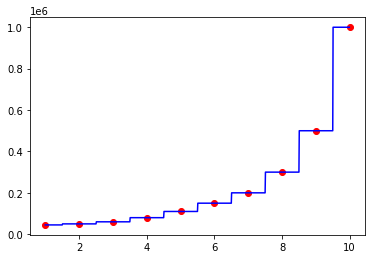

In [10]:
plt.scatter(x,y,color = 'red')
# arange is the function of numpy library to create a range, it tales three values
# starting index ending index and the step value
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.plot(x_grid,dtr.predict(x_grid),color = 'blue')
plt.show()
# for the trend line(regression line) i will increase the precision

## to solve the above problem we can do two things:
1- increase the size of the data
2- use a more advance/complex algorithm 

## Random forest algorithm

In [15]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,15):
    rfr = RandomForestRegressor(n_estimators=i,random_state=0)
    rfr.fit(x,y)
    q = np.array([[6.5]])
    salary = rfr.predict(q)
    print(" salary prediction with n_estimator",i," is salary",salary)

 salary prediction with n_estimator 1  is salary [200000.]
 salary prediction with n_estimator 2  is salary [155000.]
 salary prediction with n_estimator 3  is salary [153333.33333333]
 salary prediction with n_estimator 4  is salary [152500.]
 salary prediction with n_estimator 5  is salary [152000.]
 salary prediction with n_estimator 6  is salary [176666.66666667]
 salary prediction with n_estimator 7  is salary [172857.14285714]
 salary prediction with n_estimator 8  is salary [176250.]
 salary prediction with n_estimator 9  is salary [168888.88888889]
 salary prediction with n_estimator 10  is salary [167000.]
 salary prediction with n_estimator 11  is salary [165454.54545455]
 salary prediction with n_estimator 12  is salary [164166.66666667]
 salary prediction with n_estimator 13  is salary [166923.07692308]
 salary prediction with n_estimator 14  is salary [165714.28571429]


In [12]:
q = np.array([[6.5]])
salary = rfr.predict(q)
print(salary)

[167000.]


## for this dataset experiment and try to know the best n_estimator value
meaning choose different n_estimator values and calculate salary for 6.5 and see how closer it is gettng to actual 6.5 value which is 175000